In [1]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from hamiltonian import hamiltonian_para, plot, stochastic_normalize, calculate_Delta_ji, generate_delta, bf
from qannealing import annealing
from data_score import Generate_Data
import heapq
from operator import itemgetter
from analysis_toolkit import res_draw, res_extractor
import numpy as np


In [2]:
M = 100
T = 10
lamda = 1
n = 4
m = 2

In [3]:
D = Generate_Data(n, 2000)
Delta_ji = calculate_Delta_ji(n, m, D)
delta_max_i, delta_consist_ij, delta_trans_ijk = generate_delta(Delta_ji, 1.5, 1000)
print(delta_max_i, delta_consist_ij, delta_trans_ijk)


[1000. 1000. 1000. 1000.] [[1000. 1000. 1000. 1000.]
 [1000. 1000. 1000. 1000.]
 [1000. 1000. 1000. 1000.]
 [1000. 1000. 1000. 1000.]] [[[1000. 1000. 1000. 1000.]
  [1000. 1000. 1000. 1000.]
  [1000. 1000. 1000. 1000.]
  [1000. 1000. 1000. 1000.]]

 [[1000. 1000. 1000. 1000.]
  [1000. 1000. 1000. 1000.]
  [1000. 1000. 1000. 1000.]
  [1000. 1000. 1000. 1000.]]

 [[1000. 1000. 1000. 1000.]
  [1000. 1000. 1000. 1000.]
  [1000. 1000. 1000. 1000.]
  [1000. 1000. 1000. 1000.]]

 [[1000. 1000. 1000. 1000.]
  [1000. 1000. 1000. 1000.]
  [1000. 1000. 1000. 1000.]
  [1000. 1000. 1000. 1000.]]]


100%|██████████| 262144/262144 [00:25<00:00, 10415.21it/s]


Brute force results: [('1010000001100101', 2304.923970924805), ('1000000101110', 2304.9570723711886), ('100001000000101110', 2304.9570723711886), ('11010010001000101', 2304.9672889573203), ('110100011000000011', 2305.0678098824683), ('111100011000000011', 2305.0678098824683), ('1010000001000101', 2305.085542184922), ('11010000001000101', 2305.085542184922), ('1000000001110', 2305.1186436313046), ('100001000000001110', 2305.1186436313046), ('110100001000000011', 2305.1860631100703), ('111100001000000011', 2305.1860631100703), ('100111', 2305.951738693914), ('1000000000100111', 2305.951738693914), ('100000000000100111', 2305.951738693914), ('11000010000000111', 2305.995056726429), ('110000010000000111', 2305.995056726429), ('111000010000000111', 2305.995056726429), ('111', 2306.1133099540302), ('1000000000000111', 2306.1133099540302), ('11000000000000111', 2306.1133099540302), ('100000000000000111', 2306.1133099540302), ('110000000000000111', 2306.1133099540302), ('111000000000000111', 2

 12%|█▏        | 32767/262144 [00:00<00:00, 325950.53it/s]

1010000001100101 2304.923970924805


100%|██████████| 262144/262144 [00:00<00:00, 332814.40it/s]


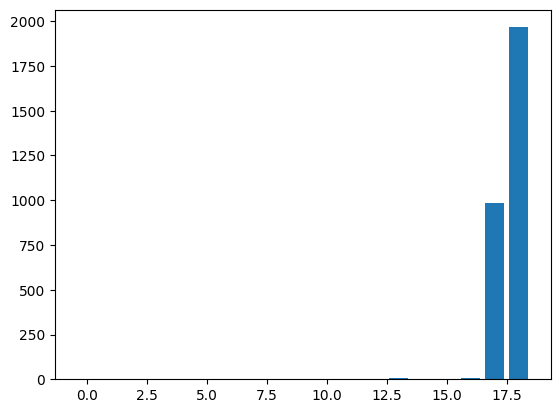

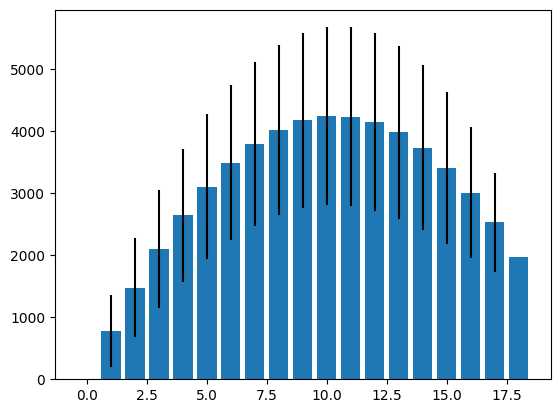

In [4]:
C, h, J = hamiltonian_para(n, m, D, delta_max_i, delta_consist_ij, delta_trans_ijk, 0, None, use_y=False)

bf(C, h, J, n)

100%|██████████| 262144/262144 [00:25<00:00, 10336.30it/s]


Brute force results: [('1010000001100101', 2304.923970924805), ('1000000101110', 2304.9570723711886), ('100001000000101110', 2304.9570723711886), ('11010010001000101', 2304.9672889573203), ('110100011000000011', 2305.0678098824683), ('111100011000000011', 2305.0678098824683), ('1010000001000101', 2305.085542184922), ('11010000001000101', 2305.085542184922), ('1000000001110', 2305.1186436313046), ('100001000000001110', 2305.1186436313046), ('110100001000000011', 2305.1860631100703), ('111100001000000011', 2305.1860631100703), ('100111', 2305.951738693914), ('1000000000100111', 2305.951738693914), ('100000000000100111', 2305.951738693914), ('11000010000000111', 2305.995056726429), ('110000010000000111', 2305.995056726429), ('111000010000000111', 2305.995056726429), ('111', 2306.1133099540302), ('1000000000000111', 2306.1133099540302), ('11000000000000111', 2306.1133099540302), ('100000000000000111', 2306.1133099540302), ('110000000000000111', 2306.1133099540302), ('111000000000000111', 2

 22%|██▏       | 58923/262144 [00:00<00:02, 95395.17it/s]

1010000001100101 2304.923970924805


100%|██████████| 262144/262144 [00:02<00:00, 97691.54it/s] 


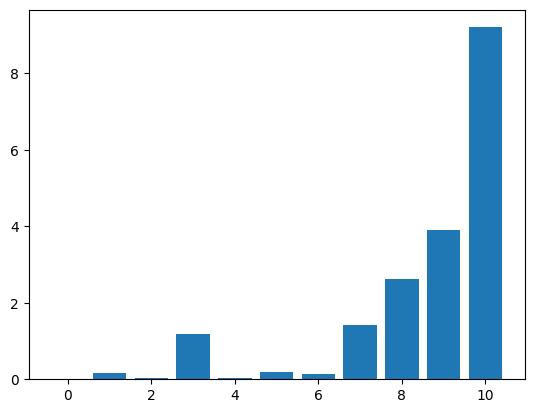

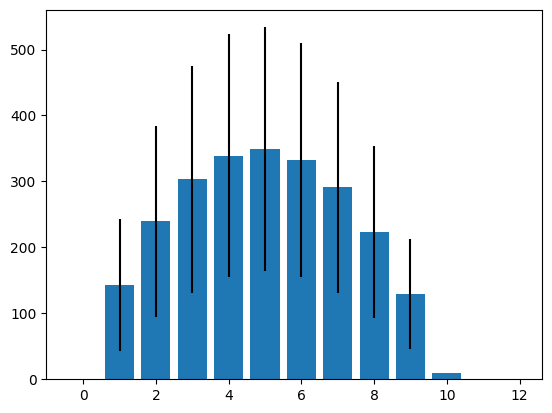

In [5]:
bf(C, h, J, n, dagDist=True)

100%|██████████| 262144/262144 [00:25<00:00, 10330.53it/s]


Brute force results: [('1010000001000101', 2320.085542184922), ('11010000001000101', 2320.085542184922), ('1000000001110', 2320.1186436313046), ('100001000000001110', 2320.1186436313046), ('110100001000000011', 2320.1860631100703), ('111100001000000011', 2320.1860631100703), ('111', 2321.1133099540302), ('1000000000000111', 2321.1133099540302), ('11000000000000111', 2321.1133099540302), ('100000000000000111', 2321.1133099540302), ('110000000000000111', 2321.1133099540302), ('111000000000000111', 2321.1133099540302), ('1010000001100101', 2324.923970924805), ('1000000101110', 2324.9570723711886), ('100001000000101110', 2324.9570723711886), ('11010010001000101', 2324.9672889573203), ('110100011000000011', 2325.0678098824683), ('111100011000000011', 2325.0678098824683), ('100111', 2325.951738693914), ('1000000000100111', 2325.951738693914), ('100000000000100111', 2325.951738693914), ('11000010000000111', 2325.995056726429), ('110000010000000111', 2325.995056726429), ('111000010000000111', 

 25%|██▌       | 65672/262144 [00:00<00:00, 326701.52it/s]

1010000001000101 2320.085542184922


100%|██████████| 262144/262144 [00:00<00:00, 333973.52it/s]


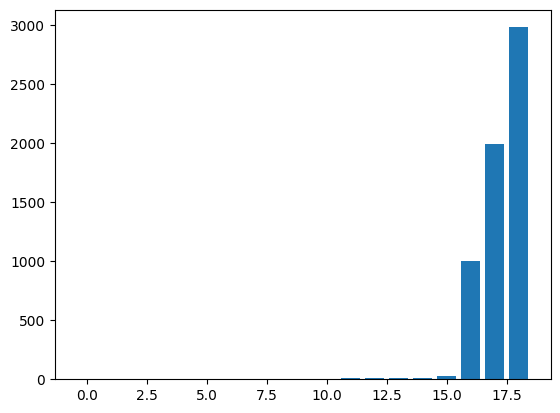

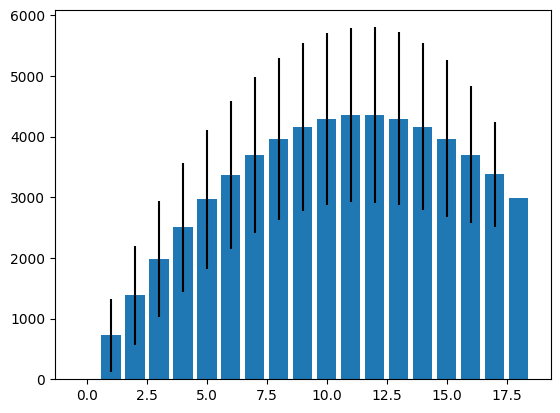

In [6]:
C, h, J = hamiltonian_para(n, m, D, delta_max_i, delta_consist_ij, delta_trans_ijk, 5, None, use_y=False)

bf(C, h, J, n)

100%|██████████| 262144/262144 [00:25<00:00, 10323.45it/s]


Brute force results: [('1010000001000101', 2320.085542184922), ('11010000001000101', 2320.085542184922), ('1000000001110', 2320.1186436313046), ('100001000000001110', 2320.1186436313046), ('110100001000000011', 2320.1860631100703), ('111100001000000011', 2320.1860631100703), ('111', 2321.1133099540302), ('1000000000000111', 2321.1133099540302), ('11000000000000111', 2321.1133099540302), ('100000000000000111', 2321.1133099540302), ('110000000000000111', 2321.1133099540302), ('111000000000000111', 2321.1133099540302), ('1010000001100101', 2324.923970924805), ('1000000101110', 2324.9570723711886), ('100001000000101110', 2324.9570723711886), ('11010010001000101', 2324.9672889573203), ('110100011000000011', 2325.0678098824683), ('111100011000000011', 2325.0678098824683), ('100111', 2325.951738693914), ('1000000000100111', 2325.951738693914), ('100000000000100111', 2325.951738693914), ('11000010000000111', 2325.995056726429), ('110000010000000111', 2325.995056726429), ('111000010000000111', 

 22%|██▏       | 57960/262144 [00:00<00:02, 93408.95it/s]

1010000001000101 2320.085542184922


 45%|████▍     | 117391/262144 [00:01<00:01, 92807.83it/s]

11010000001000101 2320.085542184922


100%|██████████| 262144/262144 [00:02<00:00, 96813.62it/s] 


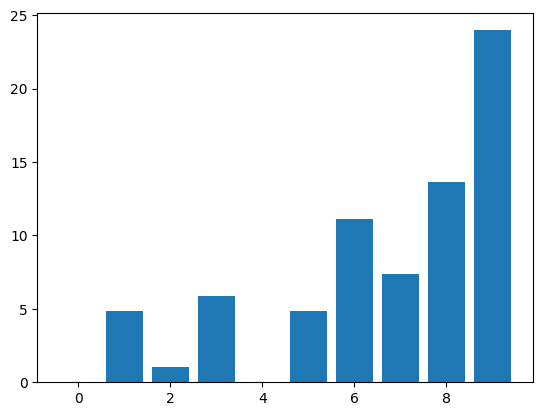

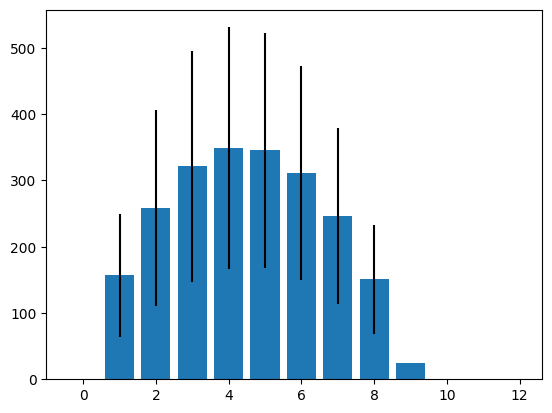

In [7]:
bf(C, h, J, n, dagDist=True)

100%|██████████| 262144/262144 [00:25<00:00, 10425.83it/s]


Brute force results: [('1010000001000101', 2365.085542184922), ('11010000001000101', 2365.085542184922), ('1000000001110', 2365.1186436313046), ('100001000000001110', 2365.1186436313046), ('110100001000000011', 2365.1860631100703), ('111100001000000011', 2365.1860631100703), ('111', 2366.1133099540302), ('1000000000000111', 2366.1133099540302), ('11000000000000111', 2366.1133099540302), ('100000000000000111', 2366.1133099540302), ('110000000000000111', 2366.1133099540302), ('111000000000000111', 2366.1133099540302), ('100101001000001010', 2383.4922405443654), ('110101001000001010', 2383.4922405443654), ('1010000001100101', 2384.923970924805), ('1000000101110', 2384.9570723711886), ('100001000000101110', 2384.9570723711886), ('11010010001000101', 2384.9672889573203), ('110100011000000011', 2385.0678098824683), ('111100011000000011', 2385.0678098824683), ('100111', 2385.951738693914), ('1000000000100111', 2385.951738693914), ('100000000000100111', 2385.951738693914), ('11000010000000111'

 12%|█▏        | 31062/262144 [00:00<00:00, 308260.37it/s]

1010000001000101 2365.085542184922


100%|██████████| 262144/262144 [00:00<00:00, 326342.82it/s]


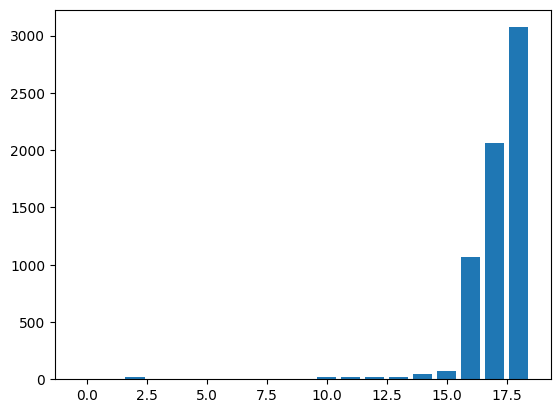

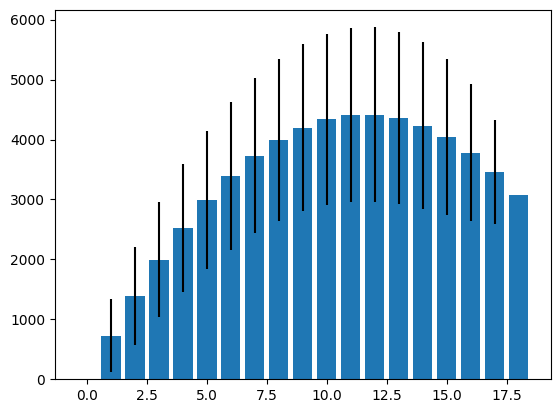

In [8]:
C, h, J = hamiltonian_para(n, m, D, delta_max_i, delta_consist_ij, delta_trans_ijk, 20, None, use_y=False)

bf(C, h, J, n)

100%|██████████| 262144/262144 [00:25<00:00, 10338.20it/s]


Brute force results: [('1010000001000101', 2365.085542184922), ('11010000001000101', 2365.085542184922), ('1000000001110', 2365.1186436313046), ('100001000000001110', 2365.1186436313046), ('110100001000000011', 2365.1860631100703), ('111100001000000011', 2365.1860631100703), ('111', 2366.1133099540302), ('1000000000000111', 2366.1133099540302), ('11000000000000111', 2366.1133099540302), ('100000000000000111', 2366.1133099540302), ('110000000000000111', 2366.1133099540302), ('111000000000000111', 2366.1133099540302), ('100101001000001010', 2383.4922405443654), ('110101001000001010', 2383.4922405443654), ('1010000001100101', 2384.923970924805), ('1000000101110', 2384.9570723711886), ('100001000000101110', 2384.9570723711886), ('11010010001000101', 2384.9672889573203), ('110100011000000011', 2385.0678098824683), ('111100011000000011', 2385.0678098824683), ('100111', 2385.951738693914), ('1000000000100111', 2385.951738693914), ('100000000000100111', 2385.951738693914), ('11000010000000111'

 27%|██▋       | 70350/262144 [00:00<00:01, 100468.23it/s]

1010000001000101 2365.085542184922


 50%|█████     | 131256/262144 [00:01<00:01, 98623.44it/s]

11010000001000101 2365.085542184922


100%|██████████| 262144/262144 [00:02<00:00, 97877.43it/s] 


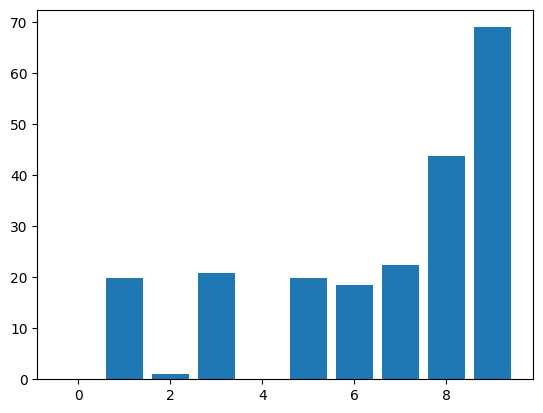

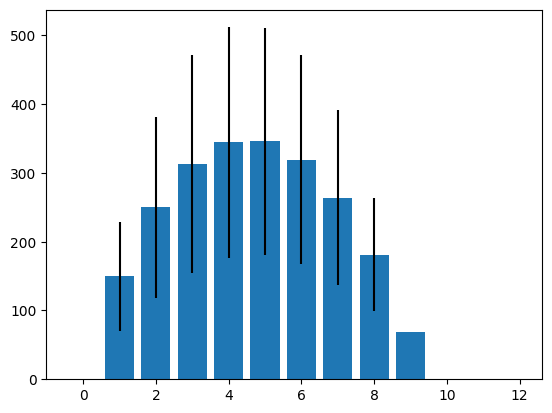

In [9]:
bf(C, h, J, n, dagDist=True)

100%|██████████| 262144/262144 [00:26<00:00, 10021.13it/s]


Brute force results: [('1010000001000101', 2455.085542184922), ('11010000001000101', 2455.085542184922), ('1000000001110', 2455.1186436313046), ('100001000000001110', 2455.1186436313046), ('110100001000000011', 2455.1860631100703), ('111100001000000011', 2455.1860631100703), ('111', 2456.1133099540302), ('1000000000000111', 2456.1133099540302), ('11000000000000111', 2456.1133099540302), ('100000000000000111', 2456.1133099540302), ('110000000000000111', 2456.1133099540302), ('111000000000000111', 2456.1133099540302), ('100101001000001010', 2473.4922405443654), ('110101001000001010', 2473.4922405443654), ('11110001001000001', 2478.9252334636685), ('111110001001000001', 2478.9252334636685), ('11000001001100', 2485.8113652543084), ('1011000001001100', 2485.8113652543084), ('1010000001100101', 2504.923970924806), ('1000000101110', 2504.9570723711886), ('100001000000101110', 2504.9570723711886), ('11010010001000101', 2504.9672889573203), ('110100011000000011', 2505.0678098824683), ('11110001

 21%|██        | 54613/262144 [00:00<00:00, 281063.14it/s]

1010000001000101 2455.085542184922


100%|██████████| 262144/262144 [00:00<00:00, 317542.16it/s]


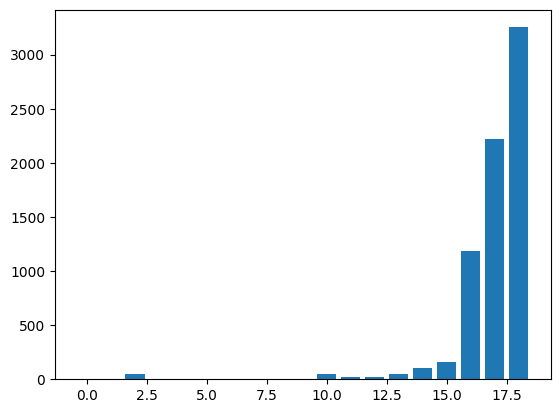

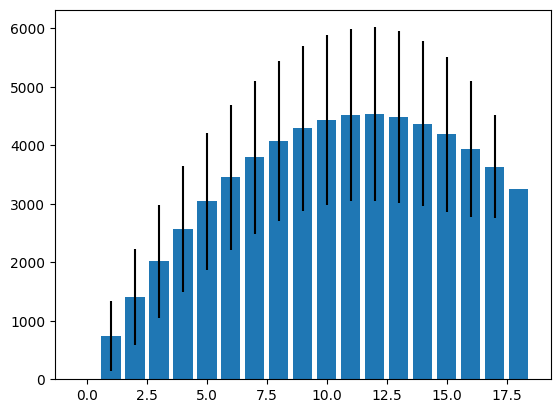

In [10]:
C, h, J = hamiltonian_para(n, m, D, delta_max_i, delta_consist_ij, delta_trans_ijk, 50, None, use_y=False)

bf(C, h, J, n)

100%|██████████| 262144/262144 [00:26<00:00, 10064.21it/s]


Brute force results: [('1010000001000101', 2455.085542184922), ('11010000001000101', 2455.085542184922), ('1000000001110', 2455.1186436313046), ('100001000000001110', 2455.1186436313046), ('110100001000000011', 2455.1860631100703), ('111100001000000011', 2455.1860631100703), ('111', 2456.1133099540302), ('1000000000000111', 2456.1133099540302), ('11000000000000111', 2456.1133099540302), ('100000000000000111', 2456.1133099540302), ('110000000000000111', 2456.1133099540302), ('111000000000000111', 2456.1133099540302), ('100101001000001010', 2473.4922405443654), ('110101001000001010', 2473.4922405443654), ('11110001001000001', 2478.9252334636685), ('111110001001000001', 2478.9252334636685), ('11000001001100', 2485.8113652543084), ('1011000001001100', 2485.8113652543084), ('1010000001100101', 2504.923970924806), ('1000000101110', 2504.9570723711886), ('100001000000101110', 2504.9570723711886), ('11010010001000101', 2504.9672889573203), ('110100011000000011', 2505.0678098824683), ('11110001

 19%|█▊        | 49067/262144 [00:00<00:02, 88487.76it/s]

1010000001000101 2455.085542184922


 44%|████▍     | 115791/262144 [00:01<00:01, 91283.84it/s]

11010000001000101 2455.085542184922


100%|██████████| 262144/262144 [00:02<00:00, 92026.04it/s]


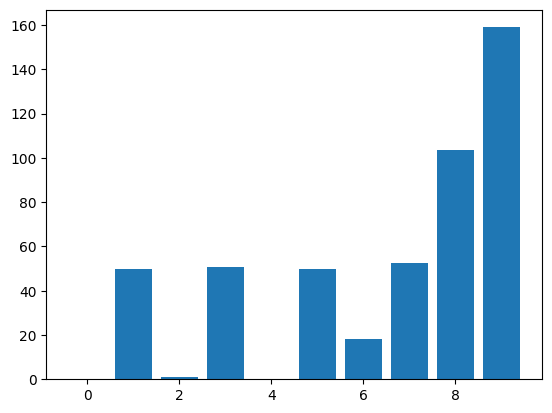

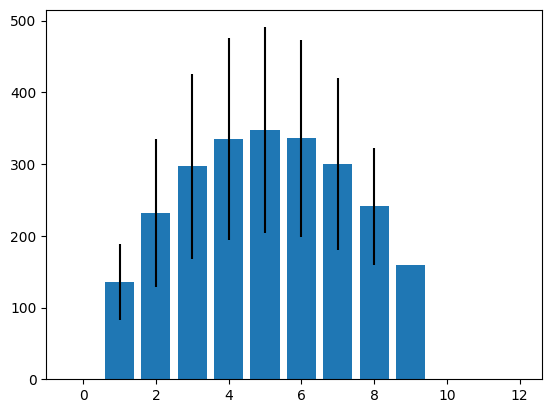

In [11]:
bf(C, h, J, n, dagDist=True)

100%|██████████| 262144/262144 [00:26<00:00, 9996.07it/s] 


Brute force results: [('0', 2967.937971853044), ('1000000000000', 2967.937971853044), ('11000000000000', 2967.937971853044), ('111000000000000', 2967.937971853044), ('1000000000000000', 2967.937971853044), ('1010000000000000', 2967.937971853044), ('1011000000000000', 2967.937971853044), ('1111000000000000', 2967.937971853044), ('11000000000000000', 2967.937971853044), ('11010000000000000', 2967.937971853044), ('11110000000000000', 2967.937971853044), ('11111000000000000', 2967.937971853044), ('100000000000000000', 2967.937971853044), ('100001000000000000', 2967.937971853044), ('100101000000000000', 2967.937971853044), ('100111000000000000', 2967.937971853044), ('110000000000000000', 2967.937971853044), ('110100000000000000', 2967.937971853044), ('110101000000000000', 2967.937971853044), ('110111000000000000', 2967.937971853044), ('111000000000000000', 2967.937971853044), ('111100000000000000', 2967.937971853044), ('111110000000000000', 2967.937971853044), ('111111000000000000', 2967.93

 13%|█▎        | 32862/262144 [00:00<00:00, 327777.09it/s]

0 2967.937971853044


100%|██████████| 262144/262144 [00:00<00:00, 315268.44it/s]


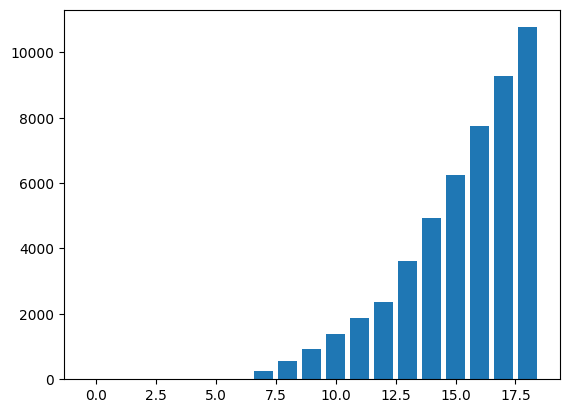

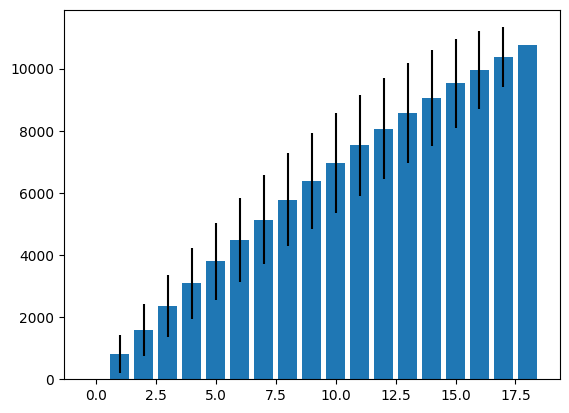

In [14]:
C, h, J = hamiltonian_para(n, m, D, delta_max_i, delta_consist_ij, delta_trans_ijk, 500, None, use_y=False)

bf(C, h, J, n)

In [15]:
import networkx as nx

In [30]:
def draw(x):
    if len(x) < len(h):
        x = '0' * (len(h) - len(x)) + x
    x = x[::-1]
    d = np.zeros((n, n))
    idx = 0
    for i in range(n):
        for k in range(n-1):
            j = k + 1 if k >= i else k
            d[i, j] = 1 if x[idx] == '1' else 0
            idx += 1
    
    G = nx.DiGraph()
    for i in range(n):
        G.add_node(i, desc=str(i))

    edge_list = []
    for i in range(n):
        for j in range(n):
            if d[i, j]:
                edge_list.append((i, j))
    G.add_edges_from(edge_list)

    pos = nx.circular_layout(G)
    node_labels = nx.get_node_attributes(G, 'desc')
    nx.draw_networkx(G, pos = pos, with_labels=None)
    nx.draw_networkx_labels(G, pos, node_labels)

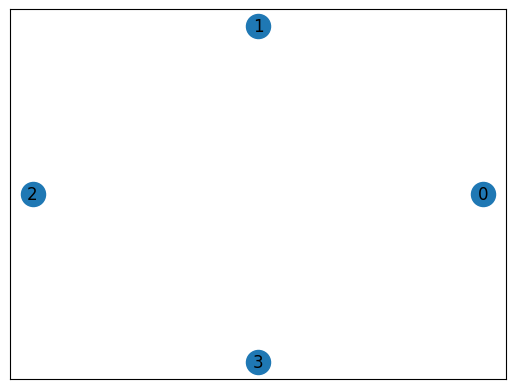

In [31]:
draw('0')

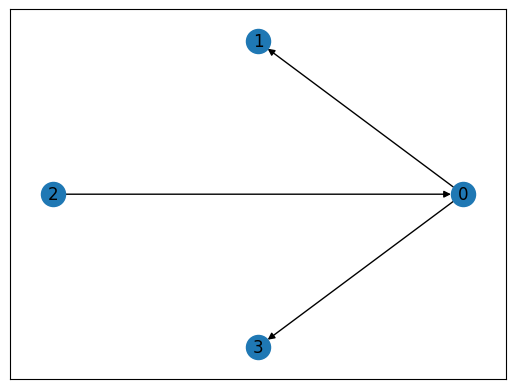

In [32]:
draw('1010000001000101')

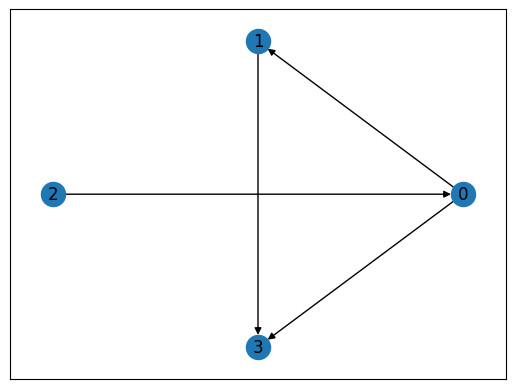

In [33]:
draw('1010000001100101')

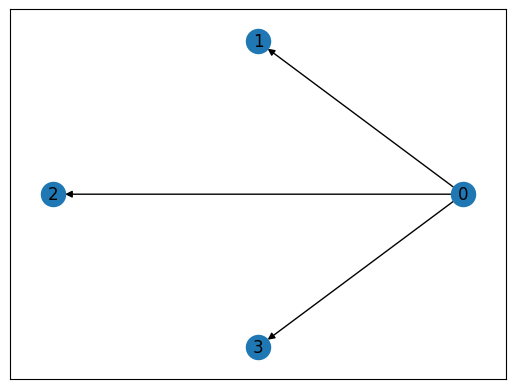

In [34]:
draw('111')